# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [4]:
# Write your code here.
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
linear_target_predicted = linear_model.predict(data_train)


from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
tree_target_predicted = tree.predict(data_train)



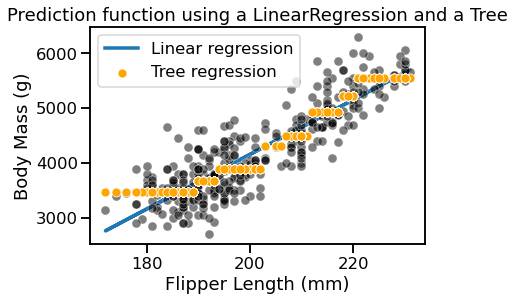

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_train, linear_target_predicted, label="Linear regression", zorder=0)
sns.scatterplot(x=data_train.to_numpy().reshape(-1), y=tree_target_predicted, label="Tree regression", color='orange')
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and a Tree")

Create a testing dataset, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the predictions of each model
using this test dataset.

In [45]:
import numpy as np

# Write your code here.
number_of_test_samples = data_train.shape[0]
data_test=np.linspace(data_train.min()[0], data_train.max()[0], number_of_test_samples).reshape(-1,1)

linear_predictions = linear_model.predict(data_test)
tree_predictions = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both model on the top.

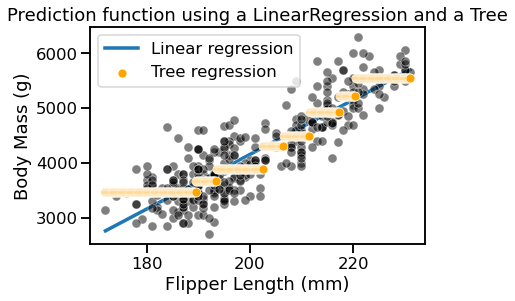

In [48]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, linear_predictions, label="Linear regression", zorder=0)
sns.scatterplot(x=data_test.reshape(-1), y=tree_predictions, label="Tree regression", color='orange')
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and a Tree")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing the value of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [51]:
# Write your code here.
fake_data_test=np.linspace(data_train.min()[0]/2, 2*data_train.max()[0], number_of_test_samples).reshape(-1,1)

linear_predictions = linear_model.predict(fake_data_test)
tree_predictions = tree.predict(fake_data_test)

Finally, make predictions with both model on this new testing set. Repeat
the plotting of the previous exercise.

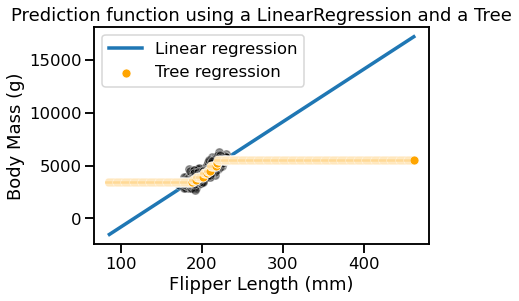

In [53]:
# Write your code here.

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(fake_data_test, linear_predictions, label="Linear regression", zorder=0)
sns.scatterplot(x=fake_data_test.reshape(-1), y=tree_predictions, label="Tree regression", color='orange')
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and a Tree")